# Exercise 3.2: Tree Maps, Area Charts, and Stacked Area Charts: Python
Michael Hotaling

In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import matplotlib.ticker as ticker

# Tree map

In [2]:
df = pd.read_table('expenditures.txt')
df.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [3]:
df['money'] = ["${:,.0f}".format(i) for i in df['expenditure']]
df['labels'] = df['category'] + ": \n" + df['money']

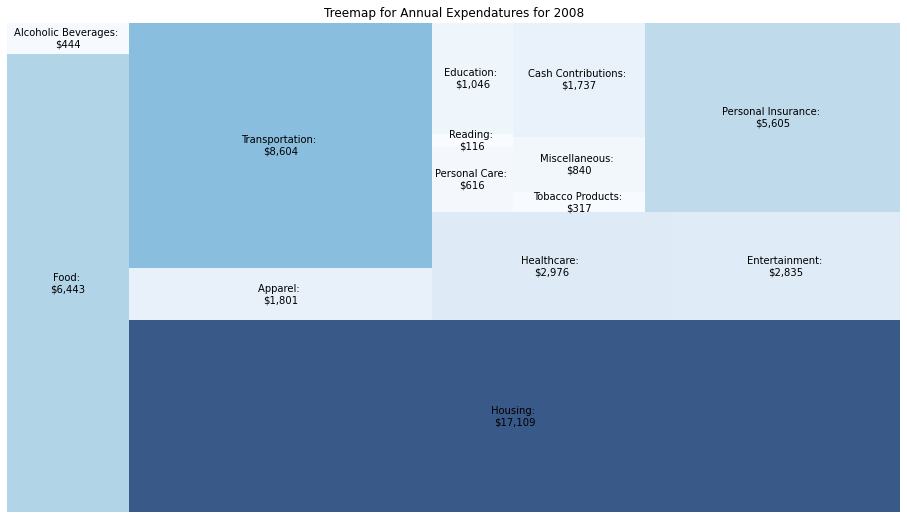

In [4]:
df2 = df[df['year'] == 2008]
my_values=df2['expenditure']
 
# create a color palette, mapped to these values
cmap = mpl.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]

plt.figure(figsize=(16,9))
squarify.plot(sizes=my_values, label = df2['labels'] , alpha=.8, color=colors );

plt.title("Treemap for Annual Expendatures for 2008")
plt.axis('off')
plt.show()

# Area chart

In [5]:
df = pd.read_csv("unemployement-rate-1948-2010.csv")
df.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [6]:
df['Date'] = df['Year'] + df['Period'].apply(lambda x: int(x[1::])/12)
df['Percentage'] = df['Value'] / 100

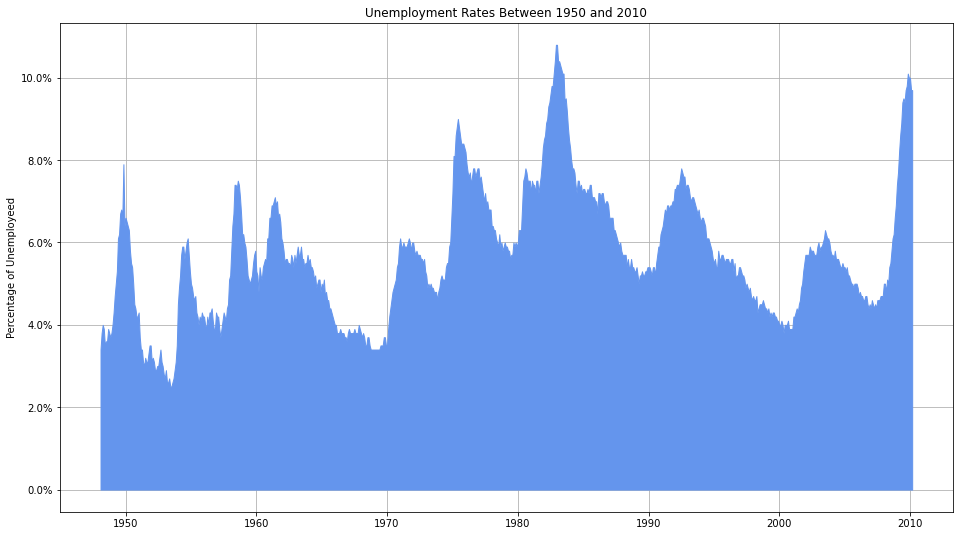

In [7]:
plt.figure(figsize=(16,9))
plt.fill_between(df['Date'], df['Percentage'], color = 'cornflowerblue', zorder = 4)
plt.title("Unemployment Rates Between 1950 and 2010")
plt.ylabel("Percentage of Unemployeed")
plt.grid()
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(1))
plt.show()

# Stacked Area Chart

In [8]:
df = pd.read_table('expenditures.txt')
df.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [9]:
df = df.pivot_table(values="expenditure", columns='category', index='year')
df = df.reset_index()

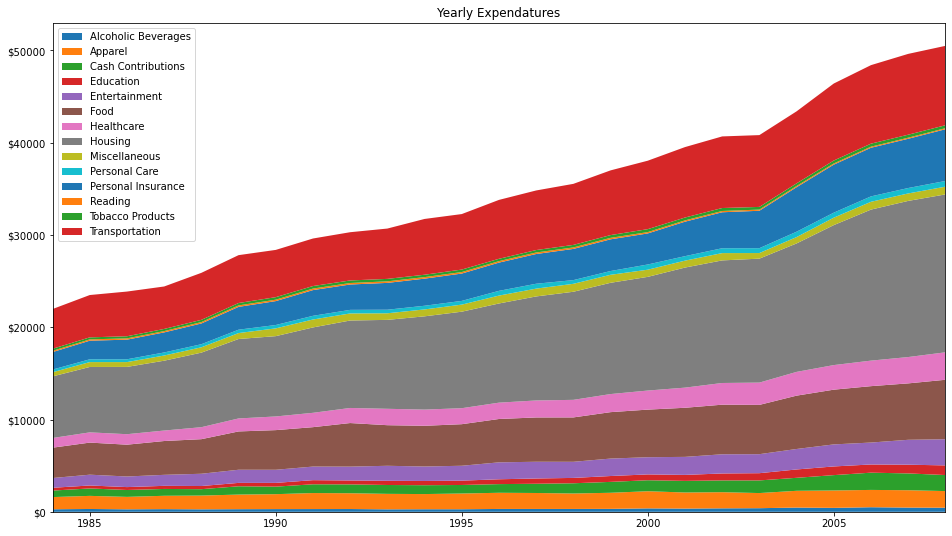

In [10]:

fig, ax = plt.subplots(figsize = (16,9))

ax.stackplot(df['year'],
              df['Alcoholic Beverages'],
              df['Apparel'],
              df['Cash Contributions'],
              df['Education'],
              df['Entertainment'],
              df['Food'],
              df['Healthcare'],
              df['Housing'],
              df['Miscellaneous'],
              df['Personal Care'],
              df['Personal Insurance'],
              df['Reading'],
              df['Tobacco Products'],
              df['Transportation'],
             labels=df.columns[1:])

ax.legend(loc = 'upper left')
plt.title("Yearly Expendatures")
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

plt.xlim(min(df['year']), max(df['year']))
plt.show()